# 대여소와 사고다발 지점 간의 관계 찾기

### 사고다발지의 단순통계 및 시각화

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
accident = pd.read_csv('data/자전거사고다발지역정보.csv', encoding = 'CP949')
accident.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [3]:
accident.shape

(2718, 15)

In [4]:
# 시도시군구명 컬럼에서 '서울특별시'가 포함된 행만 추출하여 accident_seoul 이라는 변수에 넣는다.

accident_seoul = accident.loc[accident['시도시군구명'].str.contains('서울특별시')]
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [5]:
accident_seoul.shape

(1018, 15)

In [6]:
accident_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  1018 non-null   object 
 1   사고다발지ID   1018 non-null   int64  
 2   법정동코드     1018 non-null   int64  
 3   지점코드      1018 non-null   int64  
 4   시도시군구명    1018 non-null   object 
 5   지점명       1018 non-null   object 
 6   발생건수      1018 non-null   int64  
 7   사상자수      1018 non-null   int64  
 8   사망자수      1018 non-null   int64  
 9   중상자수      1018 non-null   int64  
 10  경상자수      1018 non-null   int64  
 11  부상신고자수    1018 non-null   int64  
 12  경도        1018 non-null   float64
 13  위도        1018 non-null   float64
 14  다발지역폴리곤   1018 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 127.2+ KB


In [7]:
accident_seoul=accident_seoul.dropna(subset=['위도'])
accident_seoul=accident_seoul.dropna(subset=['경도'])
accident_seoul.shape

(1018, 15)

In [8]:
accident_map = folium.Map(location=[accident_seoul['위도'].mean(), accident_seoul['경도'].mean()], zoom_start=10.8, tiles='CartoDB positron')
for i, row in accident_seoul.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=1,
        fill=True,
    ).add_to(accident_map)
accident_map

In [9]:
accident_map = folium.Map(location=[accident_seoul['위도'].mean(), accident_seoul['경도'].mean()], zoom_start=10.8, tiles='CartoDB positron')
plugins.HeatMap(accident_seoul[['위도', '경도']].values.tolist(), radius=10, blur=5).add_to(accident_map)
plugins.Fullscreen(positions='topright').add_to(accident_map)
accident_map

In [10]:
# 지점명 컬럼에 있는 내용들을 공백 마다 자르고, 두번째 단어만을 이용하여 지역구라는 컬럼에 새로이 추가한다.
# 이렇게 하게 된다면 지역구 별로 묶을 수 있게 된다.

accident_seoul['지역구']=accident['지점명'].str.split(" ").str[1]
accident_seoul=accident_seoul.drop(['다발지역폴리곤'], axis='columns')
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,지역구
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,종로구
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,종로구
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,종로구
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,중구
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,용산구


In [93]:
# size() 함수를 이용하여 지역구 별로 사고다발지가 몇군데 있는지 확인 할 수 있다.

accident_seoul_gu = accident_seoul.groupby('지역구').size()
accident_seoul_gu = accident_seoul_gu.to_frame()
accident_seoul_gu.columns = ['사고다발지 개수']
accident_seoul_gu

,사고다발지 개수
지역구,
강남구,18
강동구,55
강북구,34
강서구,31
관악구,25
광진구,53
구로구,49
금천구,20
노원구,47


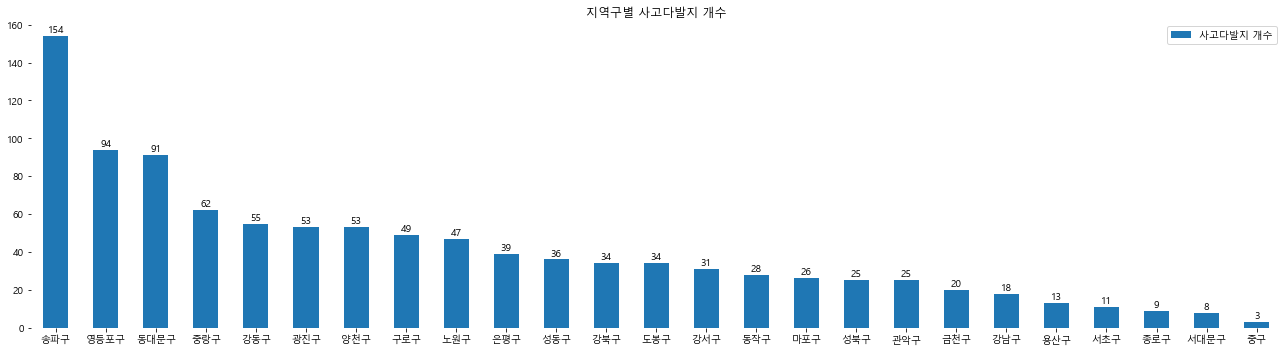

In [126]:
accident_seoul_gu_sort = accident_seoul_gu.sort_values(by=['사고다발지 개수'], axis=0, ascending=False)
ax = accident_seoul_gu_sort.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 사고다발지 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [26]:
# agg() 함수를 이용하여 지역구 별로 사고다발지에서 몇 건의 사고가 발생했는지 알 수 있다.

accident_seoul_gu_total = accident_seoul.groupby(['지역구'])[['발생건수']].agg('sum')
accident_seoul_gu_total

,발생건수
지역구,
강남구,81
강동구,308
강북구,182
강서구,161
관악구,136
광진구,318
구로구,269
금천구,101
노원구,228


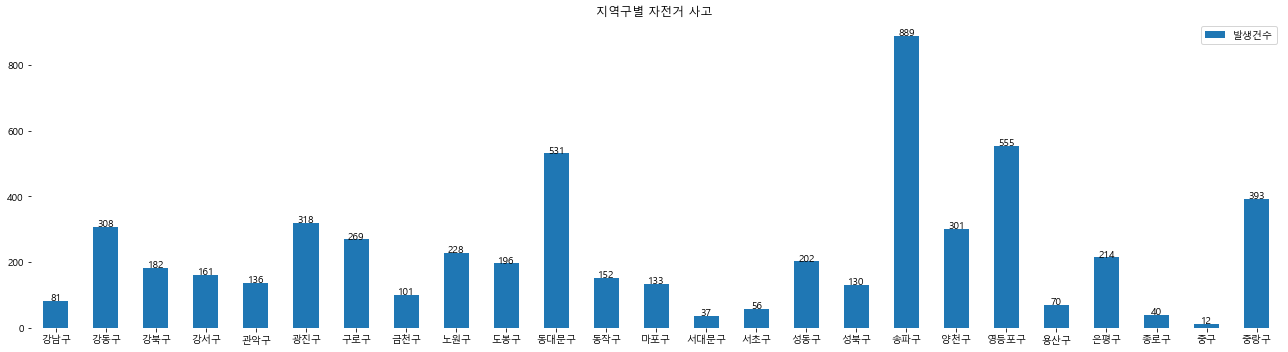

In [44]:
ax = accident_seoul_gu_total.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 사고 ")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

### 대여소 단순통계 및 시각화

In [45]:
rental = pd.read_csv('data/서울특별시 공공자전거 대여소 정보.csv')
rental.head()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40,5.0
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42,20.0
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43,14.0
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44,13.0
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45,5.0


In [46]:
# 빈값이 있을 경우 해당 행은 삭제하도록 한다.

rental=rental.dropna(subset=['위도'])
rental=rental.dropna(subset=['경도'])
rental.shape

(1540, 8)

In [79]:
# size() 함수를 이용하여 지역구 별로 대여소가 몇개 있는지 확인 할 수 있다.

have_bikes = rental.groupby('대여소_구').size()
have_bikes = have_bikes.to_frame()
have_bikes.columns = ['대여소 개수']
have_bikes

,대여소 개수
대여소_구,
강남구,99
강동구,57
강북구,39
강서구,85
관악구,51
광진구,59
구로구,64
금천구,45
노원구,68


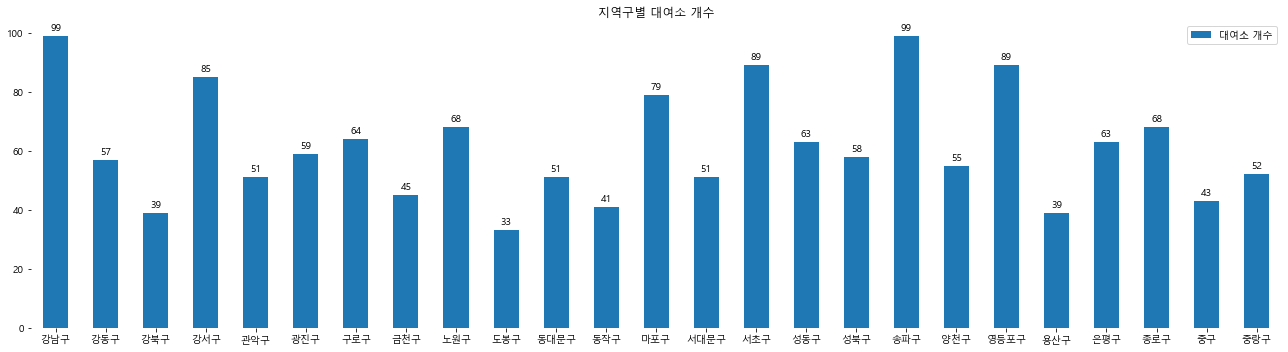

In [80]:
ax = have_bikes.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 대여소 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [81]:
# agg() 함수를 이용하여 지역구별로 대여소에 설치된 거치대수를 확인 할 수 있다.

have_bikes_total = rental.groupby(['대여소_구'])[['거치대수']].agg('sum')
have_bikes_total

,거치대수
대여소_구,
강남구,1218.0
강동구,763.0
강북구,451.0
강서구,1002.0
관악구,640.0
광진구,841.0
구로구,788.0
금천구,560.0
노원구,879.0


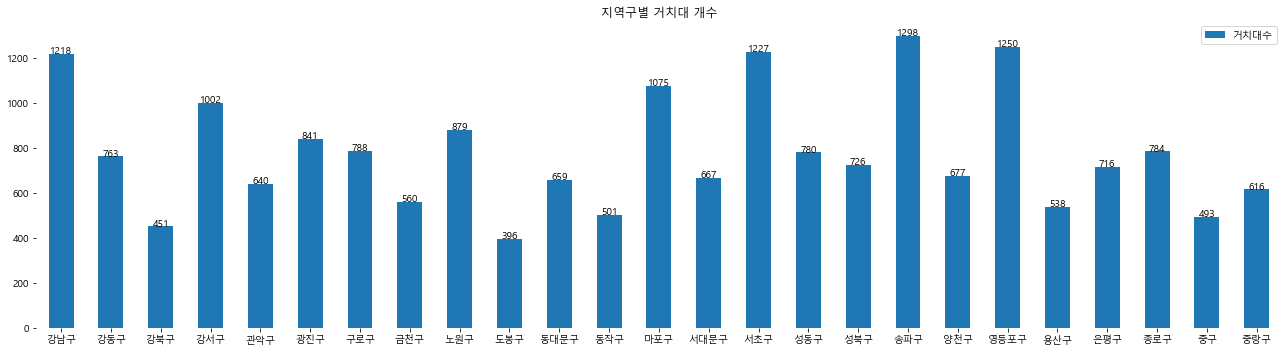

In [92]:
ax = have_bikes_total.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 거치대 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

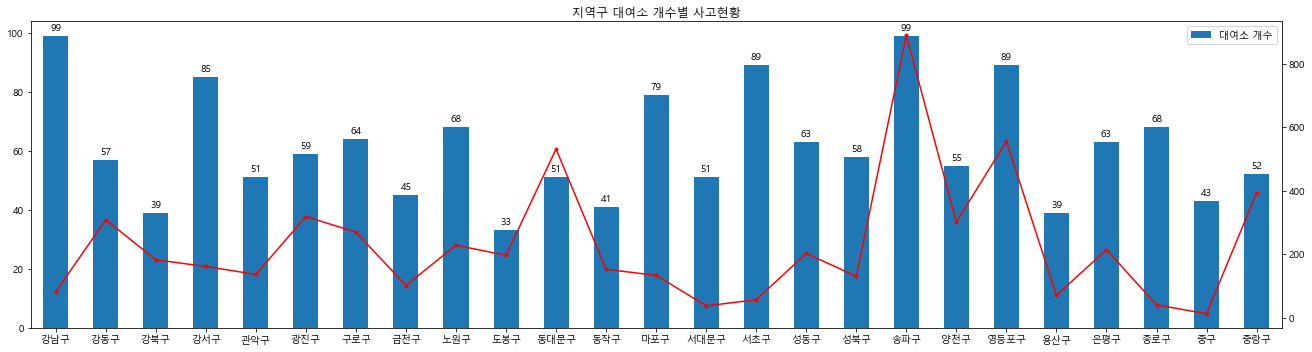

In [123]:
ax = have_bikes.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구 대여소 개수별 사고현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')

plt.box(False)
plt.xlabel('')
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(accident_seoul_gu_total ,'r.-')
# plt.legend(['사고다발지건수'])
# plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.9))
plt.show()

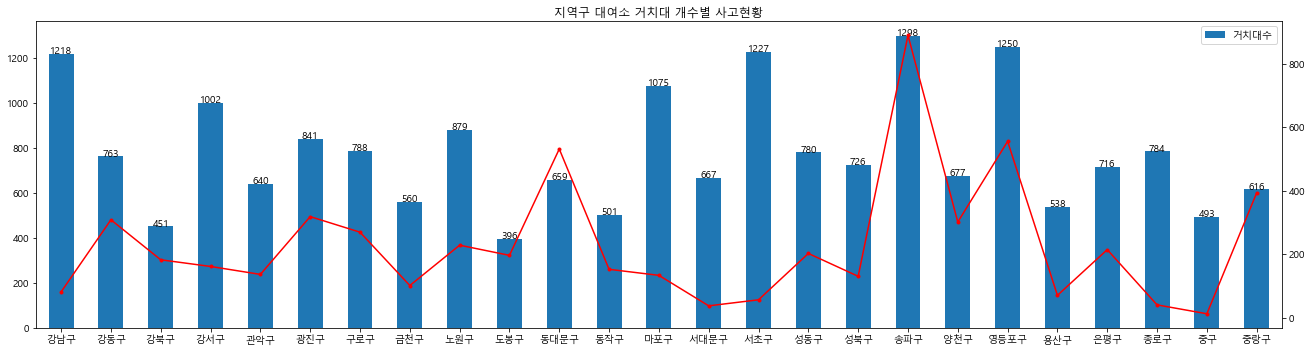

In [124]:
ax = have_bikes_total.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구 대여소 거치대 개수별 사고현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')

plt.box(False)
plt.xlabel('')
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(accident_seoul_gu_total ,'r.-')
# plt.legend(['사고다발지건수'])
plt.show()

## 지역구별 대여소 거리 분포와 지역구별 사고다발지 거리 분포 비교

In [61]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    m = 1000 * km
    return m

In [62]:
distance_gu = {}
for gu, df in rental.groupby('대여소_구'):
    distance_list = []
    for i, i_row in df.iterrows():
        min_dist = float('INF')
        for j, j_row in df.iterrows():
            if i == j:
                continue
            d = haversine(i_row['경도'], i_row['위도'], j_row['경도'], j_row['위도'])
            min_dist = d if d < min_dist else min_dist
            
        distance_list.append(min_dist)
    distance_gu[gu] = distance_list

In [63]:
distance_gu.items()

dict_items([('강남구', [648.4778278906048, 704.7472402575354, 685.7153235814396, 254.60732456420965, 236.10375240599265, 50.86071338037918, 271.96937124618546, 271.96937124618546, 130.93904608323766, 153.9942886881273, 248.88468046585837, 96.16173155997932, 608.5559577661594, 411.489447864134, 483.8222846269406, 109.29545561923368, 483.8222846269406, 467.03843593393515, 204.0082300382591, 565.5924010703615, 501.74159872507227, 134.24736926646725, 215.5141245903892, 215.5141245903892, 419.0448638407787, 419.0448638407787, 179.5607773110077, 144.98601380954014, 58.57402528928541, 183.28817468191363, 462.3828928901453, 345.0620820540274, 642.4425379986607, 147.82539093490792, 395.0856852081075, 76.07781749087899, 108.42742116490578, 252.87142908105264, 505.59821454127285, 366.28434659914166, 611.6629434859514, 577.1153083923407, 574.3623791625428, 121.19367746718324, 204.0082300382591, 373.4783587055429, 76.07781749087899, 366.28434659914166, 121.19367746718324, 248.88468046585837, 96.161731

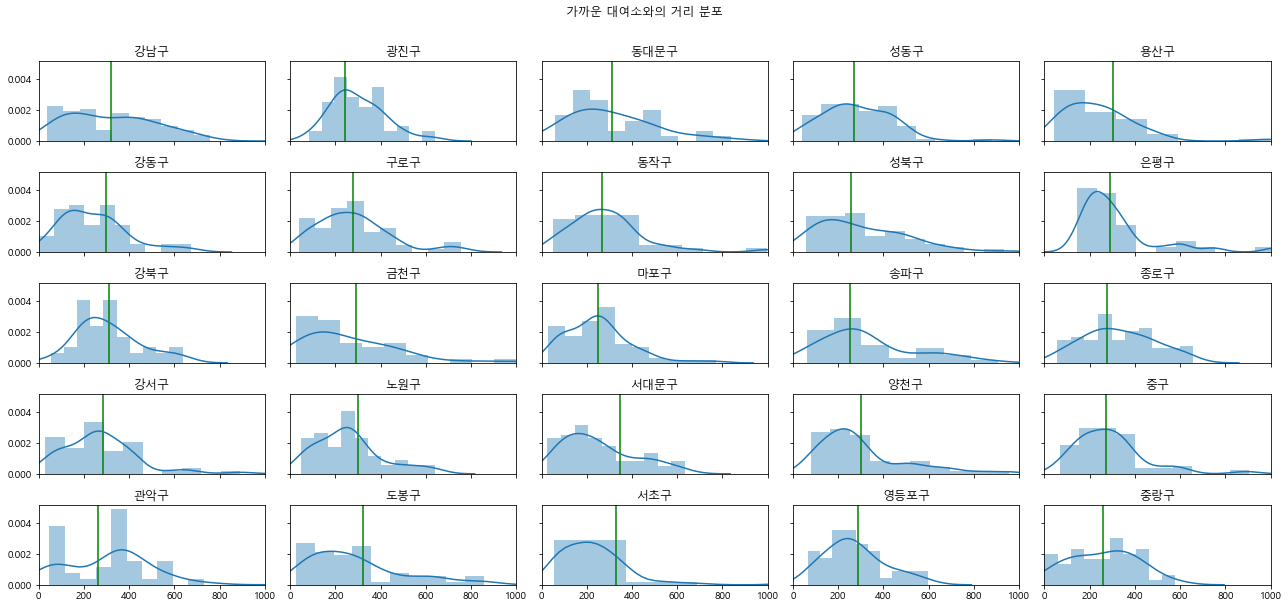

In [64]:
fig, axes = plt.subplots(5, 5, figsize=(18, 8), sharex=True, sharey=True)

i, j = 0, 0
for gu, distance_list in distance_gu.items():
    sns.distplot(distance_list, ax=axes[i][j], bins=10)
    axes[j][i].set_title(gu)
    axes[j][i].axvline(np.array(distance_list).mean(), color='green')
    j += 1
    if j >= 5:
        i += 1
        j = 0

fig.suptitle("가까운 대여소와의 거리 분포", y=1.05)
plt.xlim(0, 1000)
fig.tight_layout()
plt.show()

In [65]:
accident_dist_gu = {}
for gu, df in accident_seoul.groupby('지역구'):
    accident_dist_list = []
    for i, i_row in df.iterrows():
        accident_min_dist = float('INF')
        for j, j_row in df.iterrows():
            if i == j:
                continue
            accident_d = haversine(i_row['경도'], i_row['위도'], j_row['경도'], j_row['위도'])
            accident_min_dist = accident_d if accident_d < accident_min_dist else accident_min_dist
            
        accident_dist_list.append(accident_min_dist)
    accident_dist_gu[gu] = accident_dist_list

In [66]:
accident_dist_gu.items()

dict_items([('강남구', [2786.296218357387, 402.56983038817447, 1566.7097525951015, 66.07019398144288, 881.2804666964594, 402.56983038817447, 374.9219212019306, 243.9095806658251, 588.5958993483916, 187.70565509151322, 881.2804666964594, 591.5313990960326, 591.5313990960326, 884.2884096034832, 1113.7180200711698, 187.70565509151322, 66.07019398144288, 243.9095806658251]), ('강동구', [93.33624419455376, 154.95849434654147, 351.91993979156575, 113.91097771420228, 146.7906207742311, 19.15486078730134, 92.07870811844666, 84.52267688899352, 344.6338926139289, 74.99812004572547, 27.313557788973444, 56.79328989896733, 66.4348709272549, 31.161140594652036, 92.07870811844666, 440.8108065890199, 535.2144813552392, 456.47231547163494, 96.83984261005082, 84.52267688899352, 104.19513550305295, 19.968165785650537, 145.6637091604196, 406.777383731649, 20.530041831545898, 66.4348709272549, 27.313557788973444, 456.4444996633093, 457.6623975214037, 154.95849434654147, 351.91993979156575, 21.265234601291464, 14

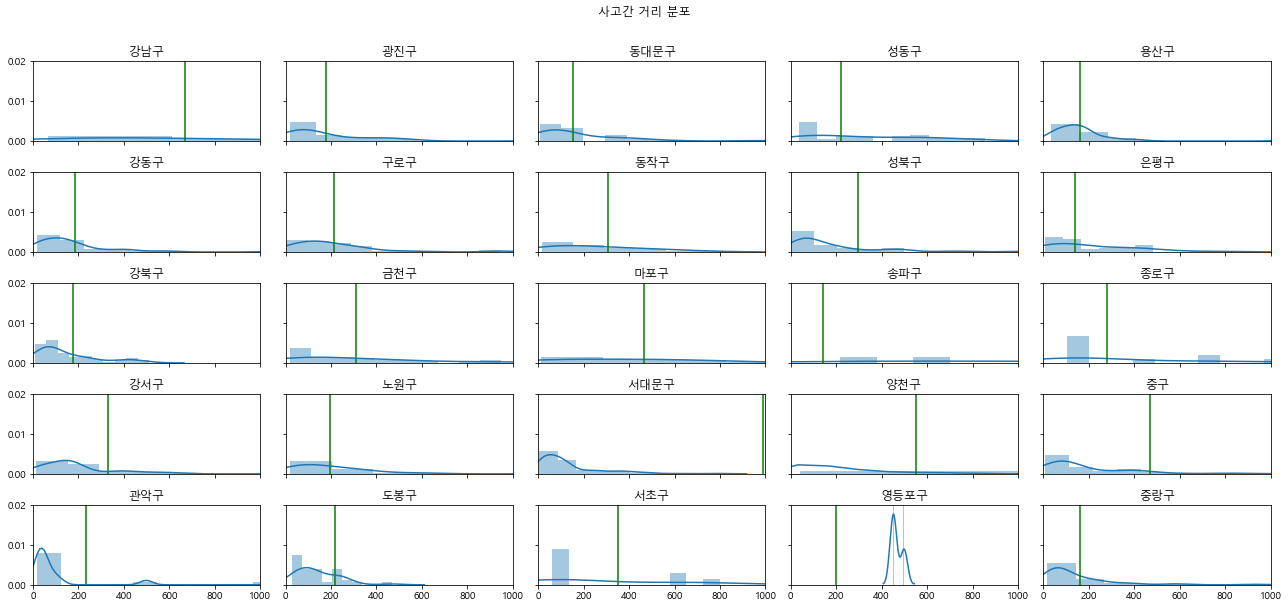

In [67]:
fig, axes = plt.subplots(5, 5, figsize=(18, 8), sharex=True, sharey=True)

i, j = 0, 0
for gu, accident_dist_list in accident_dist_gu.items():
    sns.distplot(accident_dist_list, ax=axes[i][j], bins=10)
    axes[j][i].set_title(gu)
    axes[j][i].axvline(np.array(accident_dist_list).mean(), color='green')
    j += 1
    if j >= 5:
        i += 1
        j = 0

fig.suptitle("사고간 거리 분포", y=1.05)
plt.xlim(0, 1000)
plt.ylim(0, 0.02)
fig.tight_layout()
plt.show()

In [70]:
distance_means = {gu: np.mean(distance_list) for gu, distance_list in distance_gu.items() }
distance_means = pd.Series(distance_means)
distance_means.sort_values(inplace=True)

distance_means

광진구     244.595729
마포구     249.004180
송파구     252.241342
성북구     257.890745
중랑구     259.565812
관악구     263.209558
동작구     266.937932
성동구     270.340348
중구      272.904307
종로구     276.418481
구로구     279.134097
강서구     282.685137
영등포구    288.472792
은평구     289.008319
금천구     289.457561
강동구     299.037678
노원구     301.018164
양천구     302.398903
용산구     304.771790
동대문구    310.080729
강북구     312.422884
강남구     320.073554
도봉구     321.331211
서초구     329.861767
서대문구    348.434084
dtype: float64

In [72]:
distance_means.mean()

287.6518841319121

In [71]:
accident_dist_means = {gu: np.mean(accident_dist_list) for gu, accident_dist_list in accident_dist_gu.items() }
accident_dist_means = pd.Series(accident_dist_means)
accident_dist_means.sort_values(inplace=True)

accident_dist_means

은평구     139.761749
송파구     140.499087
동대문구    153.256482
용산구     161.247127
중랑구     162.296542
강북구     178.192707
광진구     179.504975
강동구     185.679682
노원구     195.006024
영등포구    197.556756
구로구     214.149977
도봉구     217.270756
성동구     223.341653
관악구     232.761950
종로구     281.641581
성북구     296.944878
동작구     305.983219
금천구     310.668453
강서구     329.813961
서초구     351.507203
마포구     466.900546
중구      467.479997
양천구     553.040660
강남구     670.036915
서대문구    990.136365
dtype: float64

In [73]:
accident_dist_means.mean()

304.18716977511207

## 1. 대여소 개수와 사고다발지건수
## 2. 대여소 거치대수와 사고다발지건수

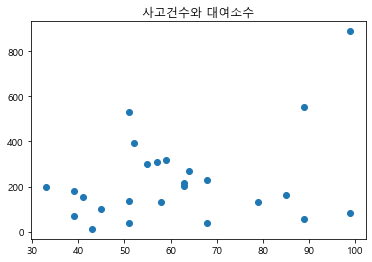

In [130]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X1 = have_bikes["대여소 개수"]
y1 = accident_seoul_gu_total["발생건수"]
plt.title("사고건수와 대여소수")
plt.plot(X1, y1, 'o')
plt.show()

In [131]:
line_fitter = LinearRegression()
line_fitter.fit(X1.values.reshape(-1,1), y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

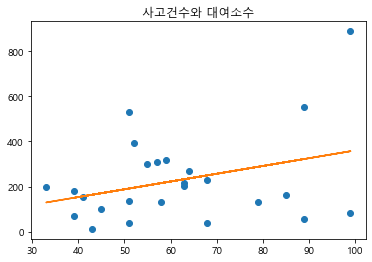

In [138]:
plt.plot(X1, y1, 'o')
plt.title("사고건수와 대여소수")
plt.plot(X1,line_fitter.predict(X1.values.reshape(-1,1)))
plt.show()

In [139]:
import scipy.stats as stats

corr1 = stats.pearsonr(X1, y1)
corr1

(0.33104908482721973, 0.10599500408771169)

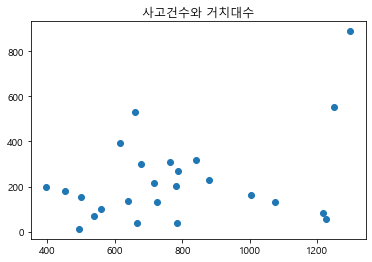

In [140]:
X2 = have_bikes_total["거치대수"]
y2 = accident_seoul_gu_total["발생건수"]
plt.plot(X2, y2, 'o')
plt.title("사고건수와 거치대수")
plt.show()

In [141]:
line_fitter = LinearRegression()
line_fitter.fit(X2.values.reshape(-1,1), y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

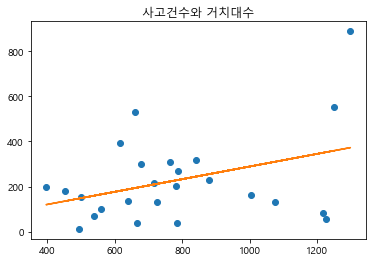

In [142]:
plt.plot(X2, y2, 'o')
plt.title("사고건수와 거치대수")
plt.plot(X2,line_fitter.predict(X2.values.reshape(-1,1)))
plt.show()

In [143]:
corr2 = stats.pearsonr(X2, y2)
corr2

(0.3720428151308132, 0.06704770946101223)